In [14]:
import pandas as pd
import matplotlib as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import tracemalloc

In [15]:
data = pd.read_csv('collisions_stat_BigShip_move_SmallShip_maxvel_10.csv')
data.head()

,dx,dy,dvx,dvy,collision
0,-20,-20,-10,-10,0
1,-20,-20,-10,-9,0
2,-20,-20,-10,-8,0
3,-20,-20,-10,-7,0
4,-20,-20,-10,-6,0


<Axes: >

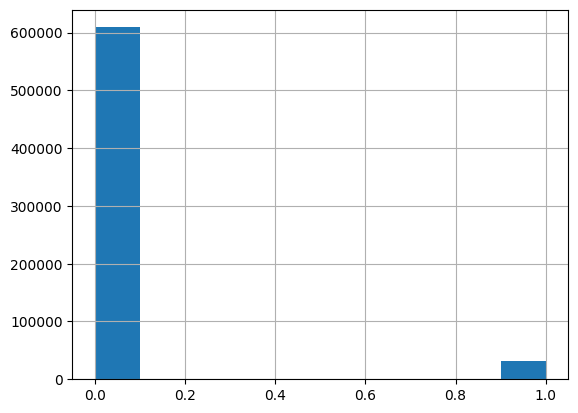

In [16]:
data['collision'].hist()

In [17]:
X = data.drop(columns=['collision'])
y = data['collision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

<Axes: >

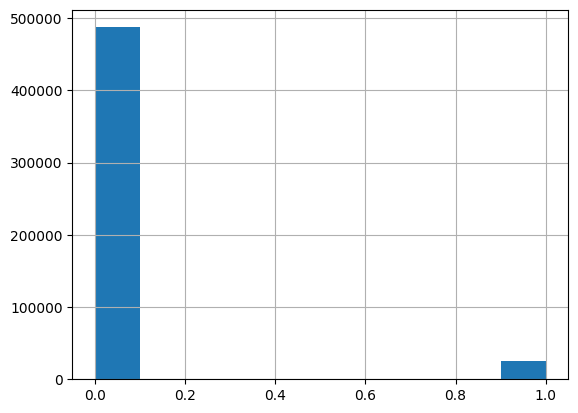

In [18]:
y_train.hist()

In [19]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X=X_train, y=y_train)

<Axes: >

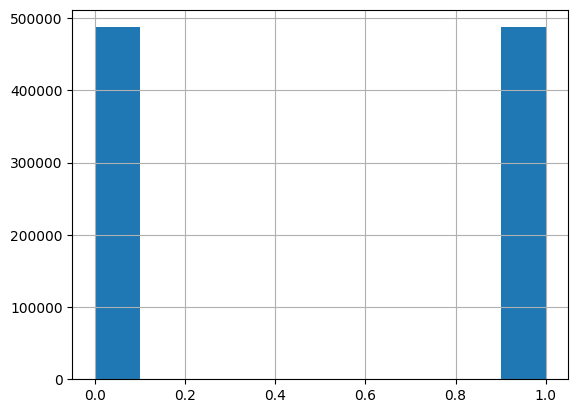

In [20]:
y_train.hist()

In [21]:
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [ ]:
tracemalloc.start()

In [23]:
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

In [ ]:
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Потребление памяти: {current / 10**6:.4f} MB (текущее), {peak / 10**6:.4f} MB (пиковое)")

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120556   1257]
 [   107   6080]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121813
           1       0.83      0.98      0.90      6187

    accuracy                           0.99    128000
   macro avg       0.91      0.99      0.95    128000
weighted avg       0.99      0.99      0.99    128000

